# Explicação:
Nesse arquivo há:
 - Junção e análise dos dados em catálogo usados para a tarefa de pré-treino.
Especificamente:
 - Tratamento do arquivo de 22GB dos objetos do Stripe82 do DR4
 - Selecão de objetos para o primeiro conjunto de pré-treino (filtrados, sem valores de 99 e seguindo a distribuição correta)
 - Breve análise desses dados

In [3]:
import pandas as pd
import numpy as np


### Gera CSV limpo:

In [4]:
columns = ['ID', 'RA', 'DEC', 'A', 'B', 'KRON_RADIUS', 'FWHM_n', 'e_r_iso', 'u_iso', 'J0378_iso', 'J0395_iso', 'J0410_iso', 'J0430_iso', 'g_iso', 'J0515_iso', 'r_iso', 
'J0660_iso', 'i_iso', 'J0861_iso', 'z_iso','SEX_FLAGS_r']
datafile = "/media/gjperin/64gbgabriel/STRIPE82_iDR4.csv"
chunksize = 100000
dfs = []
for chunk in pd.read_csv(datafile, chunksize=chunksize):
    useful = chunk[columns]
    useful = useful[(useful.SEX_FLAGS_r == 0) & (useful.r_iso < 22)]
    dfs.append(useful)

final = pd.concat(dfs)

In [15]:
final['ID'] = final['ID'].str[2:30]

In [14]:
final.to_csv('./raw_tables/S82_clean.csv')

### Retira objetos com classificação

In [17]:
unl = pd.read_csv("raw_tables/S82_clean.csv")
clf = pd.read_csv("../clf/clf.csv")
print(f"unl possui {len(unl)} linhas")
print(f"clf possui {len(clf)} linhas")

unl possui 3179663 linhas
clf possui 133131 linhas


In [40]:
clf = clf.ID
x = pd.merge(unl,clf, indicator=True, how='outer', on="ID").query('_merge=="left_only"').drop('_merge', axis=1)
print(f"x possui {len(x)} linhas")

x possui 3046532 linhas


### Retira objetos com magnitude 99

In [41]:
x = x[(x['u_iso']!= 99) & (x['J0378_iso']!= 99) & (x['J0395_iso']!= 99) & (x['J0410_iso']!= 99) & (x['J0430_iso']!= 99) & (x['g_iso']!= 99) & (x['J0515_iso']!= 99) & 
      (x['r_iso'] != 99) & (x['J0660_iso']!= 99) & (x['i_iso']!= 99) & (x['J0861_iso']!= 99) & (x['z_iso']!= 99) ]

### Análise da distribuição:

In [43]:
print(f"Existem {len(x[x.r_iso<=14])} objetos com magnitude <= 14")
for i in range(15,23):
    c = len(x[(x.r_iso>i-1)&(x.r_iso<=i)])
    print(f"Existem {c} objetos com magnitude {i-1}<r<={i} ({c/len(x)*100}%)")

Existem 17648 objetos com magnitude <= 14
Existem 25165 objetos com magnitude 14<r<=15 (2.1083242152744384%)
Existem 44332 objetos com magnitude 15<r<=16 (3.714135867734806%)
Existem 74477 objetos com magnitude 16<r<=17 (6.239684584978913%)
Existem 120550 objetos com magnitude 17<r<=18 (10.099681468362151%)
Existem 182653 objetos com magnitude 18<r<=19 (15.302672079973057%)
Existem 238015 objetos com magnitude 19<r<=20 (19.940901573556342%)
Existem 265689 objetos com magnitude 20<r<=21 (22.25942986020466%)
Existem 225073 objetos com magnitude 21<r<=22 (18.856620548558062%)


### Podar os dados para a distribuição desejada:

In [60]:
p = {(19,20):238015, (20,21):190412, (18,19):174733, (21,22):155843, (17,18):104839, (16,17):51947, (15,16):23612, (14,15):1889}
datafs = []
for key in p.keys():
    t = x[(x.r_iso > key[0]) & (x.r_iso <= key[1])]
    datafs.append(t.sample(n = p[key], axis='index', random_state=2))
final_b = pd.concat(datafs).reset_index(drop=True)

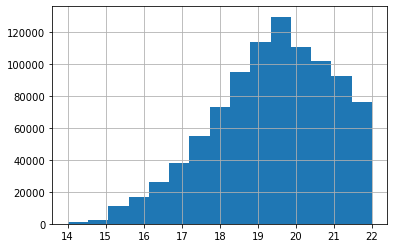

In [61]:
final_b.r_iso.hist(bins=15)

In [56]:
p = {(19,20):238015//8, (20,21):190412//8, (18,19):174733//8, (21,22):155843//8, (17,18):104839//8, (16,17):51947//8, (15,16):23612//8, (14,15):1889//8}
datafs = []
for key in p.keys():
    t = x[(x.r_iso > key[0]) & (x.r_iso <= key[1])]
    datafs.append(t.sample(n = p[key], axis='index', random_state=2))
final_s = pd.concat(datafs).reset_index(drop=True)

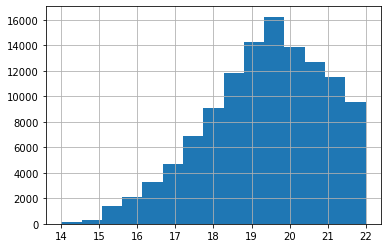

In [57]:
final_s.r_iso.hist(bins=15)

### Retira objetos sem imagem

In [74]:
IDS = ['iDR4_3_STRIPE82-0074_0050444',
'iDR4_3_STRIPE82-0088_0134958',
'iDR4_3_STRIPE82-0119_0007873',
'iDR4_3_STRIPE82-0121_0000836',
'iDR4_3_STRIPE82-0134_0029763',
'iDR4_3_STRIPE82-0087_0139570',
'iDR4_3_STRIPE82-0042_0044839',
'iDR4_3_STRIPE82-0130_0029840',
'iDR4_3_STRIPE82-0158_0030865',
'iDR4_3_STRIPE82-0087_0139219',
'iDR4_3_STRIPE82-0110_0066277',
'iDR4_3_STRIPE82-0088_0132786',
'iDR4_3_STRIPE82-0110_0074857',
'iDR4_3_STRIPE82-0088_0137405',
'iDR4_3_STRIPE82-0042_0044898',
'iDR4_3_STRIPE82-0121_0002535',
'iDR4_3_STRIPE82-0110_0074358',
'iDR4_3_STRIPE82-0119_0000975',
'iDR4_3_STRIPE82-0088_0136078',
'iDR4_3_STRIPE82-0034_0030830',
'iDR4_3_STRIPE82-0092_0104473',
'iDR4_3_STRIPE82-0119_0005304',
'iDR4_3_STRIPE82-0121_0003994',
'iDR4_3_STRIPE82-0121_0002900',
'iDR4_3_STRIPE82-0119_0003104',
'iDR4_3_STRIPE82-0036_0013965',
'iDR4_3_STRIPE82-0088_0138553']
final_s = final_s[~(final_s.ID.isin(IDS))]

### Train/Test/Val Split

In [75]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final_s, test_size=0.25,random_state=2)
train, val = train_test_split(train, test_size=0.2,random_state=2)
train.assign(split="train")
test.assign(split="test")
val.assign(split="val")
final_s = pd.concat([train,test,val])    

In [76]:
final_s.to_csv("unl_small.csv")
final_b.to_csv("unl_big.csv")

In [77]:
final_s

,Unnamed: 0,ID,RA,DEC,A,B,KRON_RADIUS,FWHM_n,e_r_iso,u_iso,...,J0410_iso,J0430_iso,g_iso,J0515_iso,r_iso,J0660_iso,i_iso,J0861_iso,z_iso,SEX_FLAGS_r
7776,7030983,iDR4_3_STRIPE82-0119_0059914,322.627755,-0.285486,0.000385,0.000369,4.238839,1.637378,0.036496,21.564539,...,22.045912,21.638773,20.991909,20.538094,19.725151,19.530891,19.195642,18.983278,18.834106,0.0
114998,7154018,iDR4_3_STRIPE82-0122_0002220,324.761795,0.035668,0.000399,0.000357,3.077435,1.089862,0.003747,17.881552,...,16.750145,16.639112,16.215332,15.992556,15.586078,15.530126,15.359089,15.281968,15.248761,0.0
8312,4401560,iDR4_3_STRIPE82-0089_0098315,301.522020,-0.262821,0.000274,0.000234,2.937651,1.022394,0.046845,22.524202,...,20.575956,21.357530,20.426039,20.056948,19.726414,19.734976,19.388985,19.505713,19.364515,0.0
84509,7164903,iDR4_3_STRIPE82-0122_0013105,324.303345,0.325145,0.000178,0.000164,1.820000,1.017672,0.088300,24.183031,...,22.987413,23.227780,22.707138,23.228012,21.009428,21.049292,20.307600,19.908516,19.922176,0.0
44133,9590,iDR4_3_STRIPE82-0001_0009591,359.663064,-1.061443,0.000457,0.000179,6.751365,3.649573,0.112069,23.180239,...,21.703121,23.341938,21.783049,21.746008,20.927141,20.966413,20.567896,20.115513,20.216870,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20120,412886,iDR4_3_STRIPE82-0010_0008681,4.996160,0.187158,0.000437,0.000301,4.779213,2.377615,0.035711,22.395674,...,21.344511,21.128733,20.197447,20.205715,19.092392,18.886892,18.457945,18.259588,18.159845,0.0
70202,3093968,iDR4_3_STRIPE82-0066_0036920,45.953887,1.204088,0.000223,0.000204,3.673313,0.999899,0.024551,21.335440,...,21.267097,21.094860,19.864952,19.693230,18.986948,18.913212,18.687162,18.644405,18.563883,0.0
64991,3191222,iDR4_3_STRIPE82-0068_0044694,47.275083,1.412130,0.000279,0.000251,3.446228,1.027189,0.011164,20.553131,...,19.071726,19.101719,18.664106,18.445887,18.078062,18.066578,17.946255,17.886286,17.894705,0.0
31108,8730988,iDR4_3_STRIPE82-0153_0047081,347.471383,-0.062198,0.000190,0.000163,2.971901,1.123835,0.071066,22.143244,...,21.676517,21.374115,21.078966,20.612246,20.740742,20.851492,20.618935,20.708536,20.492004,0.0
